# A simple introductional notebook to HEP analysis in python
In this notebook you can find an easy set of commands that show the basic computing techniques commonly used in high energy physics (HEP) analyses. It also shows how to create a histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. At the end you get a plot with the number of tracks.

Simple pyROOT notebook example

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)

The library used is ROOT - a scientific software framework that provides all the functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

First of all ROOT is imported to read the files in the _.root_ data format. A _.root_ file consists of a tree having branches and leaves. At this point you could also import further programs that contain other formulas that you maybe use more often. But here we don't import other programs to keep it simple.

However, this notebook is designed to run both on a localhost root-jupyter-server, and on google-colab-jupyter-server that run over ubuntu 18.04.

In [9]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if (IN_COLAB):
  !apt -qq install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion python2.7
  !gdown https://drive.google.com/uc?id=1bWgcTAMG7IoyQASWwrrOQrGe4haUAo9t
  !cd /; tar xzf /content/root_for_colab.tar.gz
  !rm -rf root_for_colab.tar.gz*
  import sys
  sys.path.append("/content/root/build/")
  sys.path.append("/content/root/build/bin/")
  sys.path.append("/content/root/build/include/")
  sys.path.append("/content/root/build/lib/")

import ROOT

libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.7).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.9).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.4).
python2.7 is already the newest version (2.7.17-1~18.04ubuntu1.6).
tar is already the newest version (1.29b-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Downloading...
From: https://drive.google.com/uc?id=1bWgcTAMG7IoyQASWwrrOQrGe4haUAo9t
To: /content/root_for_colab

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
#f = ROOT.TFile.Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root")
!wget https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root -O Tracks_Clusters.root
f = ROOT.TFile.Open("Tracks_Clusters.root")

--2021-11-27 02:51:31--  https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root
Resolving csandova.web.cern.ch (csandova.web.cern.ch)... 188.185.124.106, 2001:1458:d00:4a::100:f0
Connecting to csandova.web.cern.ch (csandova.web.cern.ch)|188.185.124.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2227206546 (2.1G)
Saving to: ‘Tracks_Clusters.root’

Tracks_Clusters.roo 100%[===================>]   2.07G  10.3MB/s    in 3m 32s  

2021-11-27 02:55:05 (10.0 MB/s) - ‘Tracks_Clusters.root’ saved [2227206546/2227206546]



After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _a first way to plot a variable_. The two following arguments define the width and the height of the canvas.

In [3]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)
canvas.SetGrid()

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree"

In [4]:
tree = f.Get("JetRecoTree")

Print the number of entries. This is the number of events saved.

In [ ]:
tree.Print()
tree.GetEntries()

102900

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

Now we define a histogram that will later be placed on this canvas. Its name is NPV and the header of the histogram is Example plot: Number of primary vertices. The three following arguments indicate that this histogram contains 50 so called bins which have a range from 1 to 50.

In [ ]:
hist_npv = ROOT.TH1F("NPV","Example plot: Number of primary vertices; NPV ; Events ",50,1,50)

The following lines are a loop that goes over the data (events) that is stored in the tree and fills the histogram with the event variable NPV. In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word __Done!__.

In [ ]:
for event in tree:
    hist_npv.Fill(tree.NPV)
    
print("Done!")

Done!


In [ ]:
hist_npv.SetFillColor(2)
hist_npv.Draw("hist")

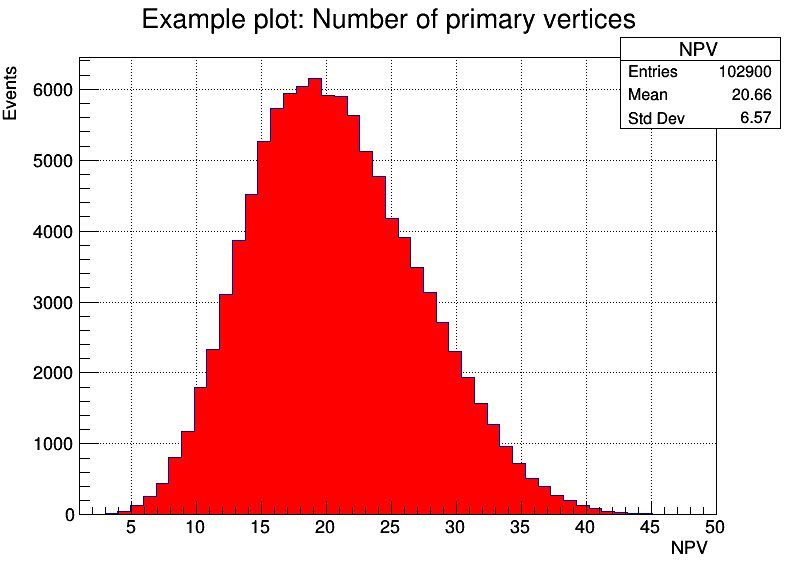

In [ ]:
canvas.Draw()

Now we normalise the histogram to the number of entries

In [ ]:
scale = hist_npv.Integral()
hist_npv.Scale(1/scale)
hist_npv.SetFillColor(2)

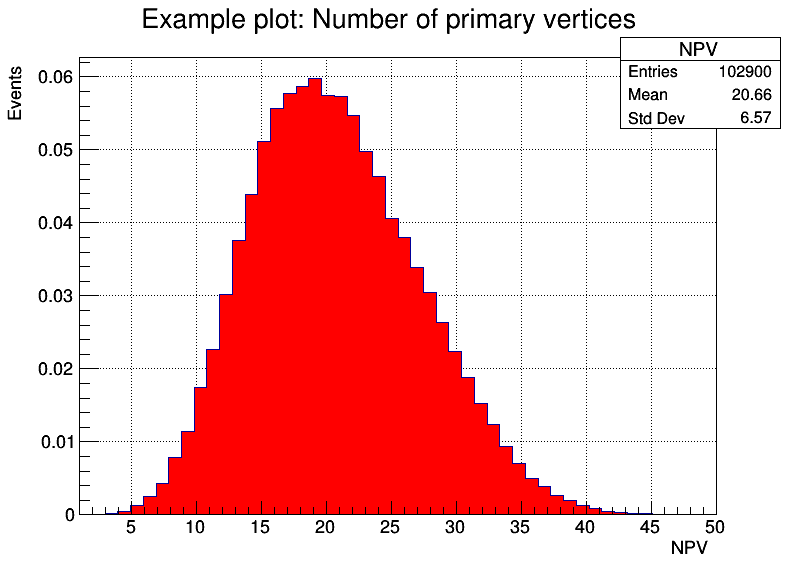

In [ ]:
hist_npv.Draw("hist")
canvas.Draw()

Some branches are not event variables, but objects with some kinematical infomation. They are stored in vectors. For example tracks and clusters. We will create two histograms to store the number of tracks and clusters in each event. 

In [ ]:
hist_nTrks = ROOT.TH1F("NTracks","Example plot: Number of tracks; NTracks ; Events ",50,0,1700)
hist_nCltrs = ROOT.TH1F("NClusters","Example plot: Number of clusters; NClusters ; Events ",50,0,1500)

For each event, fill the histograms with the size of the vectors

In [ ]:
for event in tree:
    hist_nTrks.Fill(tree.Tracks_pt.size())
    hist_nCltrs.Fill(tree.Clusters_pt.size())
print("Done!")

Done!


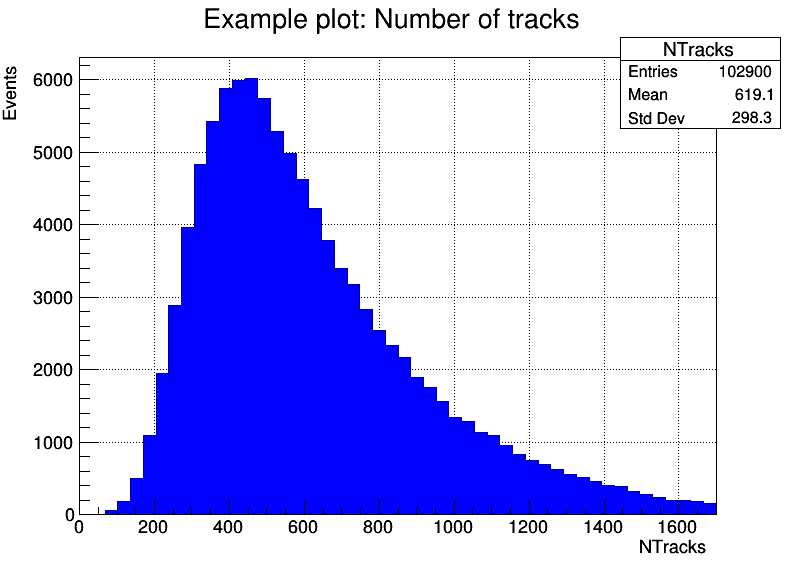

In [ ]:
hist_nTrks.SetFillColor(4)
hist_nTrks.Draw("hist")
canvas.Draw()

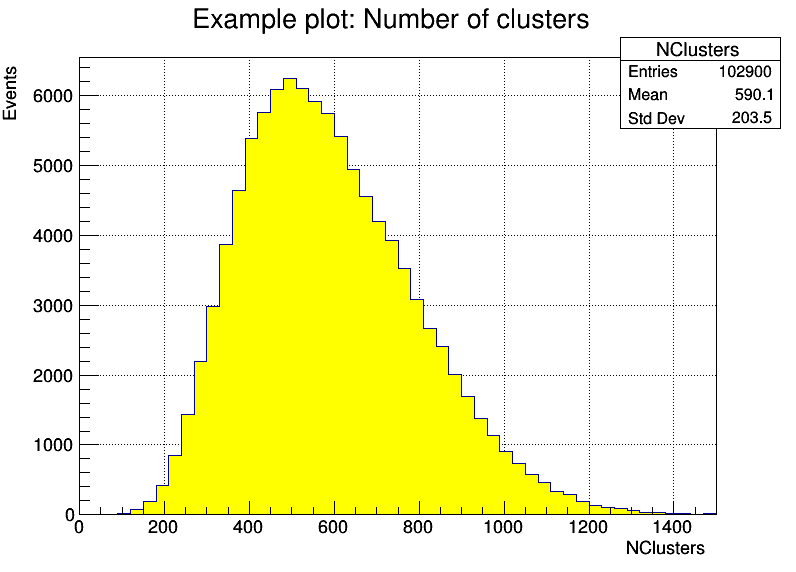

In [ ]:
hist_nCltrs.SetFillColor(5)
hist_nCltrs.Draw("hist")
canvas.Draw()

Now let us plot the pT of the "lead" track:

In [ ]:
hist_lead_track_pT = ROOT.TH1F("Lead_Track_pT","Example plot: Track pT; pT (MeV) ; Events ",50,400,2400)

In [ ]:
for event in tree:
    for tr in range(tree.Tracks_pt.size()):
        hist_lead_track_pT.Fill(tree.Tracks_pt.at(tr))
    
print("Done!")

Done!


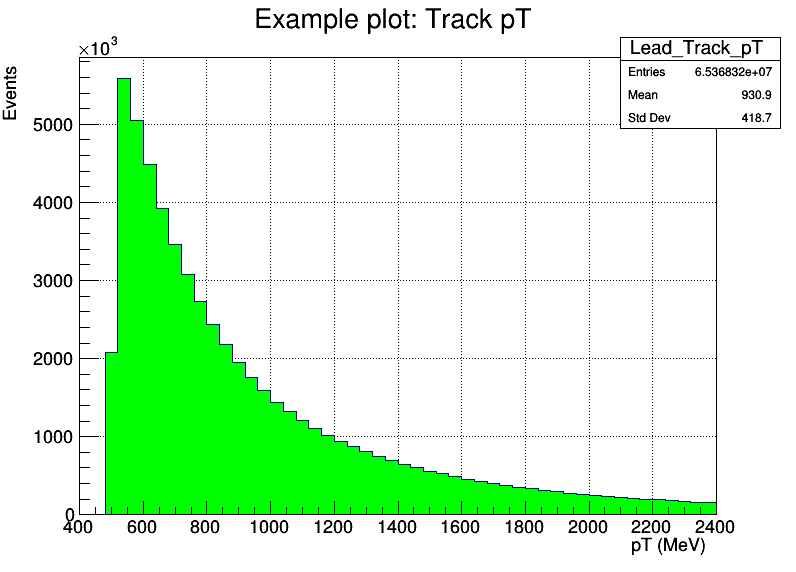

In [ ]:
hist_lead_track_pT.SetFillColor(3)
hist_lead_track_pT.Draw("hist")
canvas.Draw()

# Exercises
<b> 
1. Plot the number of average interactions per bunch-crossing (mu_average)
2. Make a 2D histogram of NPV vs. mu
3. Make a 2D histogram of NPV and mu vs. nTracks and nClusters
4. Plot all track and cluster variables
5. Interpret the meaning of each variable
6. What is "Particle PDG ID"?

</b>

## 1.Plot the number of average interactions per bunch-crossing (mu_average)


Declare a histogram (hist_mu_avg) and fill it with number of average interactions (mu_average) of each bunch-crossing (event)

In [ ]:
hist_mu_avg = ROOT.TH1F(
      "mu_avg",
      "Plot: number of average interactions per bunch-crossing; #mu_{avg} ; % Events"
      ,90,0,90)
for event in tree:
    hist_mu_avg.Fill(tree.mu_average)
print("done")

done


Once full, we normalize the histogram to 100%, paint it cyan, and print the histogram.

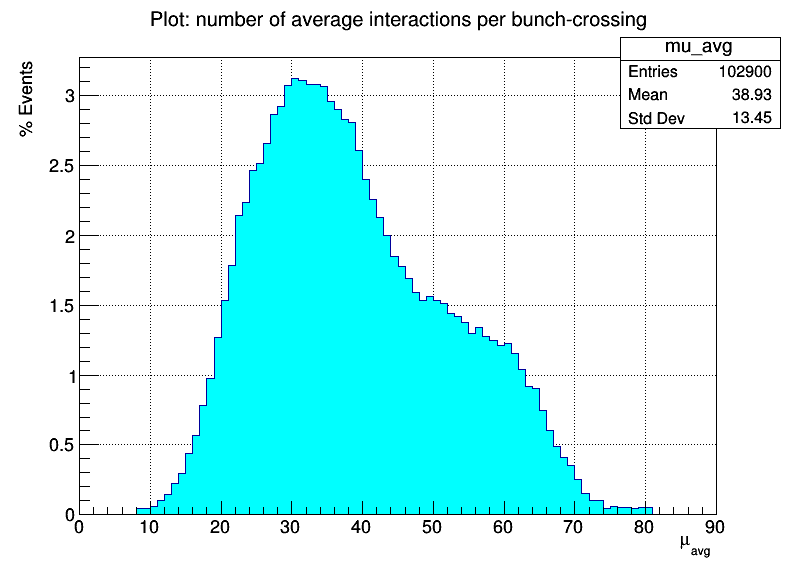

In [ ]:
scale = hist_mu_avg.Integral()
hist_mu_avg.Scale(100./scale)
hist_mu_avg.SetFillColor(7)
hist_mu_avg.Draw("hist")
canvas.Draw()

Note that on average, each bunch crossing shows 39 interactions

##Make a 2D histogram of NPV vs. mu

In [ ]:
hist_NPV_vs_mu = ROOT.TH2F("NPV_vs_mu", " ; NPV ; \mu", 50, 0, 50, 70, 10, 80);
for event in tree:
    hist_NPV_vs_mu.Fill(tree.NPV,tree.mu_average)

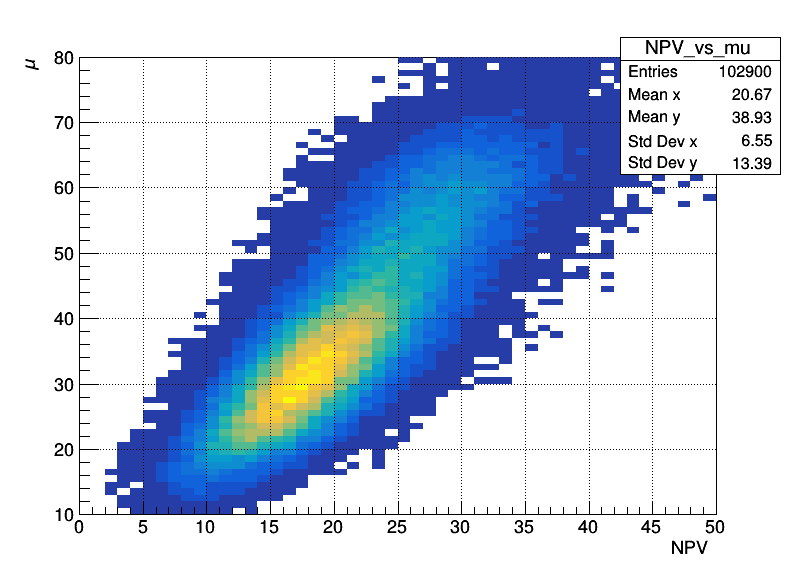

In [ ]:
hist_NPV_vs_mu.Draw("COL")
canvas.Draw()

##Make a 2D histogram of NPV and mu vs. nTracks and nClusters

In [ ]:
hist_NPV_vs_nTracks = ROOT.TH2F("NPV_vs_nTracks",  "; NPV ; nTracks", 50, 0, 50, 50, 0, 1750);
hist_NPV_vs_nClusters = ROOT.TH2F("NPV_vs_nClusters", " ; NPV ; nClusters", 50, 0, 50, 50, 0, 1500);
hist_mu_vs_nTracks = ROOT.TH2F("mu_vs_nTracks", " ; \mu ; nTracks", 70, 10, 80, 50, 0, 1750);
hist_mu_vs_nClusters = ROOT.TH2F("mu_vs_nClusters", " ; \mu ; nClusters", 70, 10, 80, 50, 0, 1500);
for event in tree:
  NPV=tree.NPV
  mu=tree.mu_average
  nTracks=tree.Tracks_pt.size()
  nClusters=tree.Clusters_pt.size()
  hist_NPV_vs_nTracks.Fill(NPV,nTracks)
  hist_NPV_vs_nClusters.Fill(NPV,nClusters)
  hist_mu_vs_nTracks.Fill(mu,nTracks)
  hist_mu_vs_nClusters.Fill(mu,nClusters)


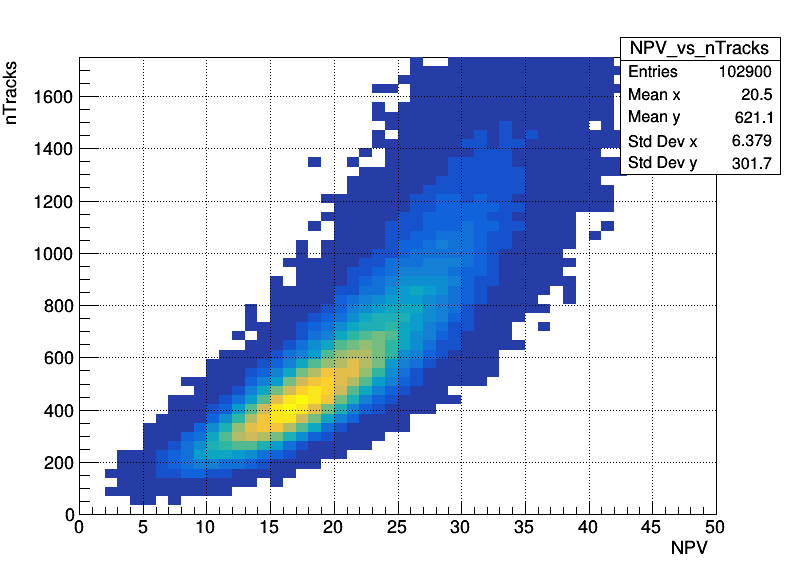

In [ ]:
hist_NPV_vs_nTracks.Draw("COL")
canvas.Draw()

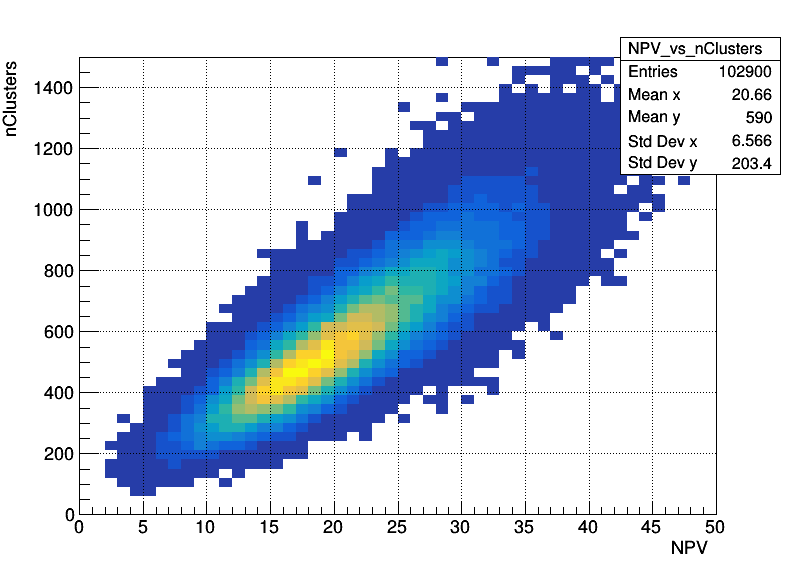

In [ ]:
hist_NPV_vs_nClusters.Draw("COL")
canvas.Draw()

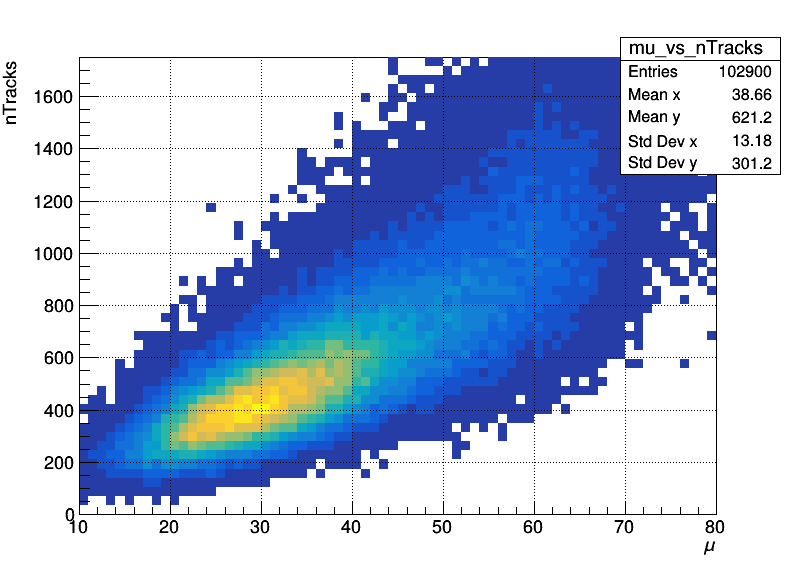

In [ ]:
hist_mu_vs_nTracks.Draw("COL")
canvas.Draw()

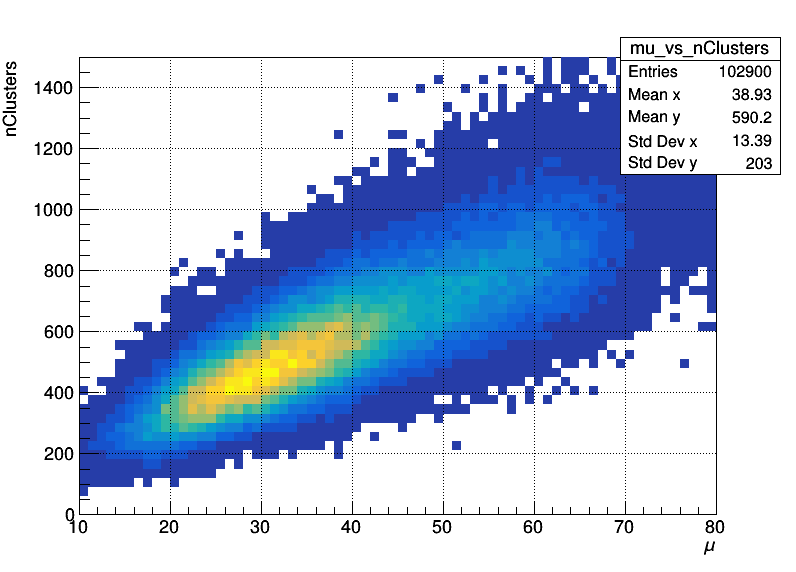

In [ ]:
hist_mu_vs_nClusters.Draw("COL")
canvas.Draw()

##Plot all track and cluster variables Interpret the meaning of each variable

The reading of these variables take a long time, separately a few minutes, a total of half an hour. We decided to install a loading bar that must be fill with the total of events.

In [8]:
!pip install etaprogress
import sys
import time
from etaprogress.progress import ProgressBar

nEvents=0
for event in tree:
  nEvents+=1
print("Number of events are = " + str(nEvents))

Number of events are = 102900


Now, we proceed to declare a histogram for each variable. For each track and cluster of each event we fill in the corresponding histogram and print the progress every 10%.

In [ ]:
print("Reading for Tracks and Clusters")
bar = ProgressBar(nEvents, max_width=100)

hist_tracks_pt = ROOT.TH1F(
    "tracks_pt",
    "Transverse moment registered by the tracker ; pt_{tracks} (MeV) ; %Events",
    100,400,2500)
hist_tracks_eta = ROOT.TH1F(
    "tracks_eta",
    "Pseudorapidity registered by the tracker ; #eta_{tracks} ; %Events",
    100,-2.7,2.7)
hist_tracks_phi = ROOT.TH1F(
    "tracks_phi",
    "Azimuthal angle registered by the tracker; #phi_{tracks} ; %Events",
    72,-3.6,3.6)
hist_tracks_m = ROOT.TH1F(
    "tracks_m",
    "Mass of the traces registered by the tracker ; m_{tracks} (MeV) ; %Events",
    100,130,150)
hist_tracks_vtx = ROOT.TH1F(
    "tracks_vtx",
    "Vertices associated with each trace ; vtx_{tracks} ; %Events",
    35,0,35)

hist_clusters_pt = ROOT.TH1F(
    "clusters_pt",
    "Transverse moment registered by the clusters ; pt_{clusters} (MeV) ; %Events",
    100,0,2500)
hist_clusters_eta = ROOT.TH1F(
    "clusters_eta",
    "Pseudorapidity registered by the clusters ; #eta_{clusters} ; %Events",
    100,-5,5)
hist_clusters_phi = ROOT.TH1F(
    "clusters_phi",
    "Azimuthal angle registered by the clusters ; #phi_{clusters} ; %Events",
    72,-3.6,3.6)
hist_clusters_m = ROOT.TH1F(
    "clusters_m",
    "Mass of the traces registered by the clusters ; m_{clusters} (MeV) ; %Events",
    100,0,200)

i=0
bar.numerator = i
print(bar)
for event in tree:
    i+=1
    if int(10*i/nEvents)!=int(10*(i-1)/nEvents):
      bar.numerator = i
      print(bar)
    for tr in range(tree.Tracks_pt.size()):
        hist_tracks_pt.Fill(tree.Tracks_pt.at(tr))
        hist_tracks_eta.Fill(tree.Tracks_eta.at(tr))
        hist_tracks_phi.Fill(tree.Tracks_phi.at(tr))
        hist_tracks_m.Fill(tree.Tracks_m.at(tr))
        hist_tracks_vtx.Fill(tree.Tracks_vtx.at(tr))
    for tr in range(tree.Clusters_pt.size()):
        hist_clusters_pt.Fill(tree.Clusters_pt.at(tr))
        hist_clusters_eta.Fill(tree.Clusters_eta.at(tr))
        hist_clusters_phi.Fill(tree.Clusters_phi.at(tr))
        hist_clusters_m.Fill(tree.Clusters_m.at(tr))
print("Done")

Transverse momentum is the projection of momentum on a plane transverse to the detector cylinder. Note that transverse low moments are more common, this because the natural path of the dispersions is preferably in the polar direction, therefore most moments will have a longitudinal component.

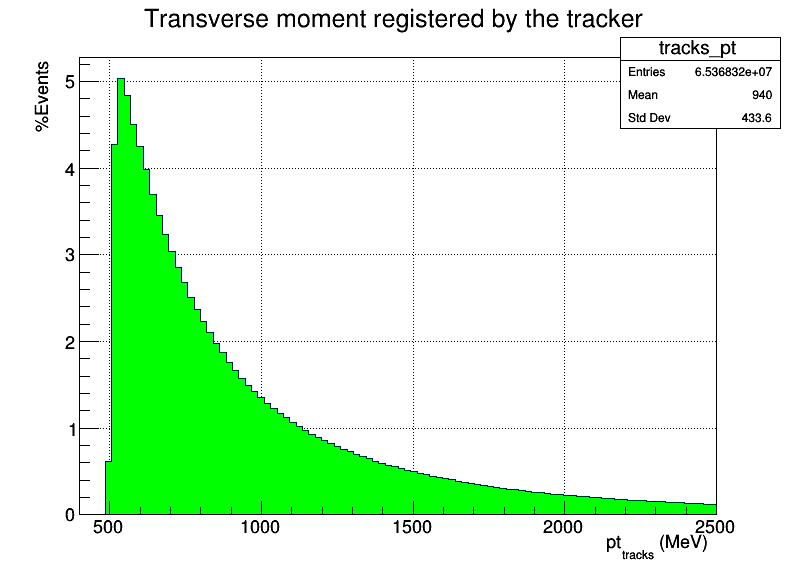

In [ ]:
scale = hist_tracks_pt.Integral()
hist_tracks_pt.Scale(100./scale)
hist_tracks_pt.SetFillColor(3)
hist_tracks_pt.Draw("hist")
canvas.Draw()

Pseudorapidity is a reparametrization of the polar angle, which suppresses intrinsically forward events. The "side" section of the tracker is up to eta=1.5 and is more efficient than the "covers", the section on the tracker covers goes up to eta=2.5. Beyond eta=2.5 there is no tracker and therefore there is no signal in the tracks. Therefore, the distribution reflects a more or less homogeneous behavior throughout the detector.

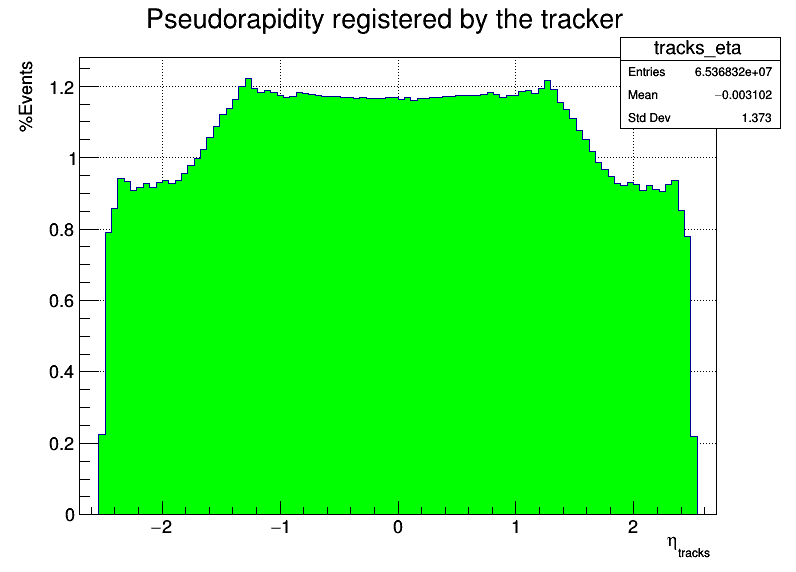

In [ ]:
scale = hist_tracks_eta.Integral()
hist_tracks_eta.Scale(100./scale)
hist_tracks_eta.SetFillColor(3)
hist_tracks_eta.Draw("hist")
canvas.Draw()

Distribution of particles at the azimuthal angle, this homogeneous distribution reflects a cylindrical symmetry by being equal in all directions of phi.

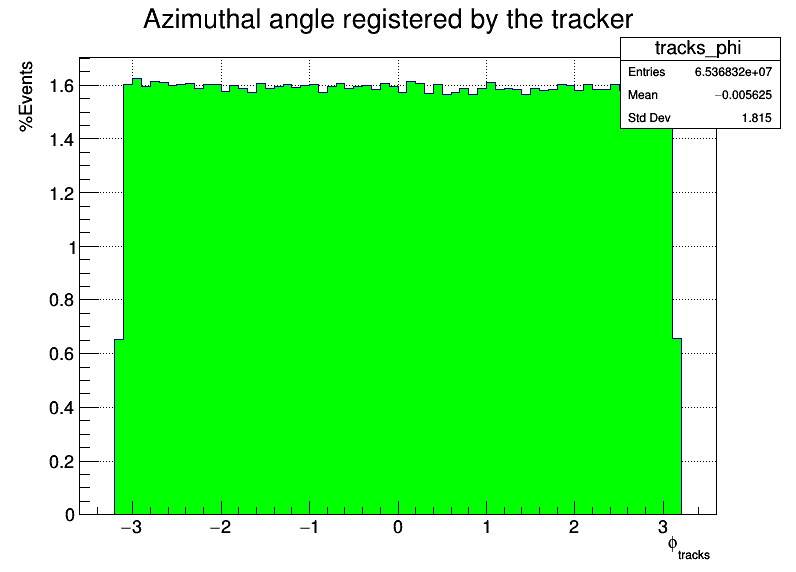

In [ ]:
scale = hist_tracks_phi.Integral()
hist_tracks_phi.Scale(100./scale)
hist_tracks_phi.SetFillColor(3)
hist_tracks_phi.Draw("hist")
canvas.Draw()

The tracker identifies the passing of hadrons with a mass of 139.6 MeV, which we can identify with charged Pions.

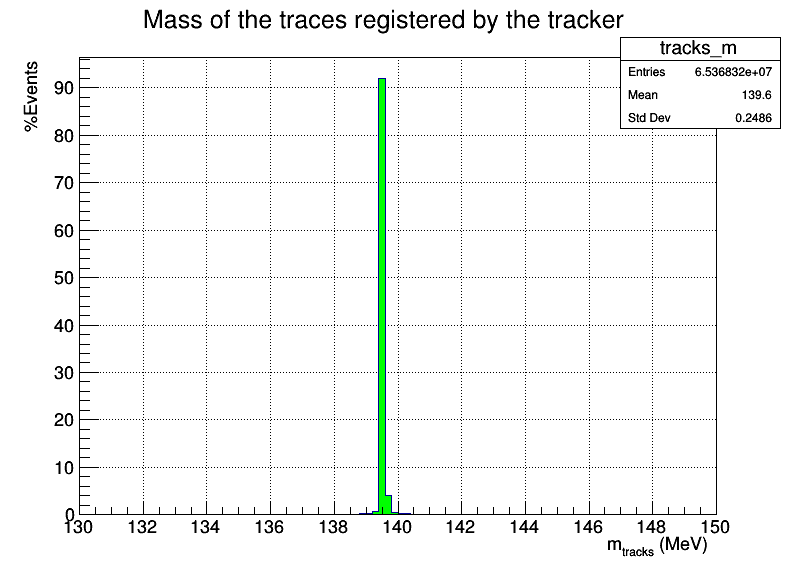

In [ ]:
scale = hist_tracks_m.Integral()
hist_tracks_m.Scale(100./scale)
hist_tracks_m.SetFillColor(3)
hist_tracks_m.Draw("hist")
canvas.Draw()

Vtx identifies the vertex to which a certain track is associated, the distribution shows that most tracks are associated with the primary vertex.

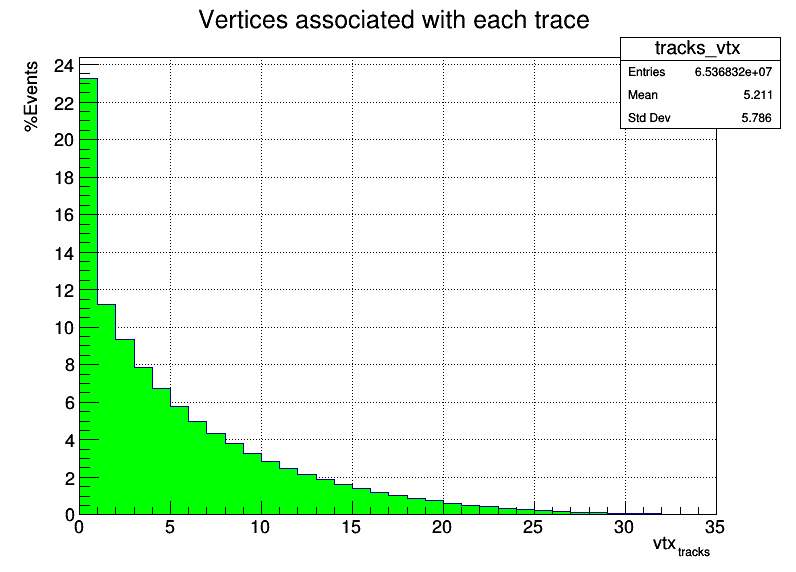

In [15]:
scale = hist_tracks_vtx.Integral()
hist_tracks_vtx.Scale(100./scale)
hist_tracks_vtx.SetFillColor(3)
hist_tracks_vtx.Draw("hist")
canvas.Draw()

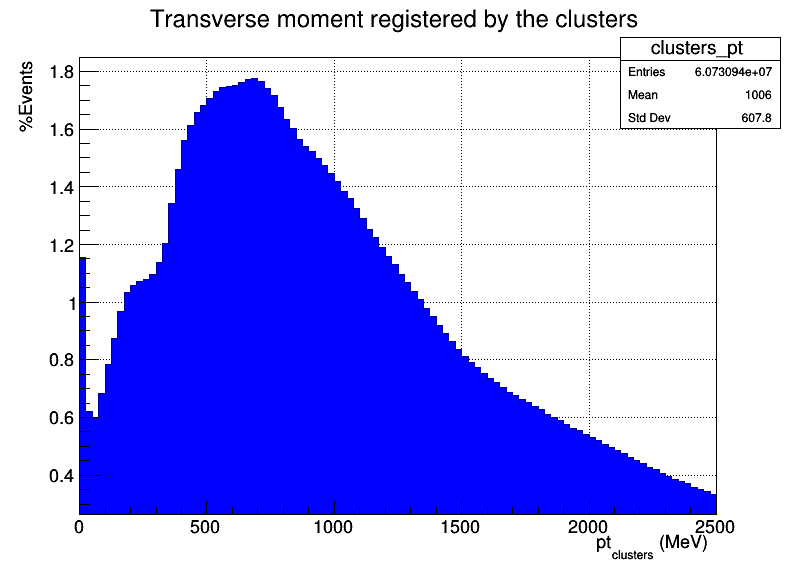

In [16]:
scale = hist_clusters_pt.Integral()
hist_clusters_pt.Scale(100./scale)
hist_clusters_pt.SetFillColor(4)
hist_clusters_pt.Draw("hist")
canvas.Draw()

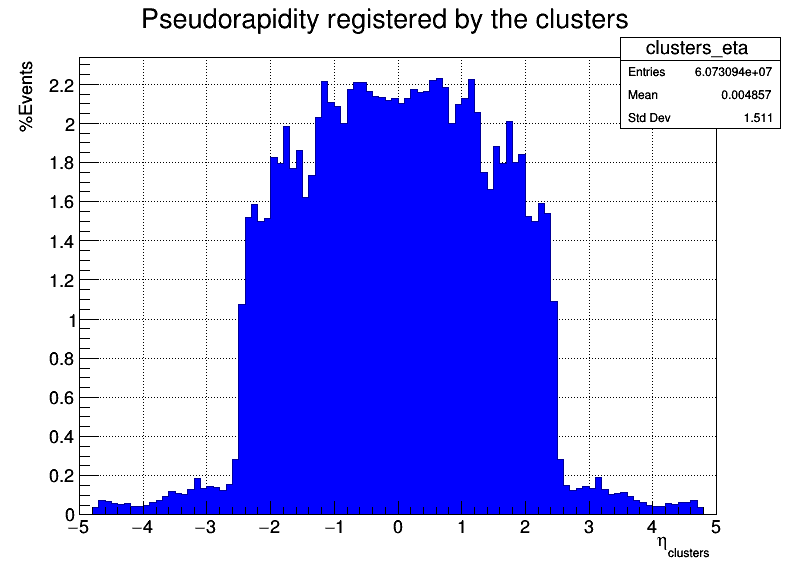

In [17]:
scale = hist_clusters_eta.Integral()
hist_clusters_eta.Scale(100./scale)
hist_clusters_eta.SetFillColor(4)
hist_clusters_eta.Draw("hist")
canvas.Draw()

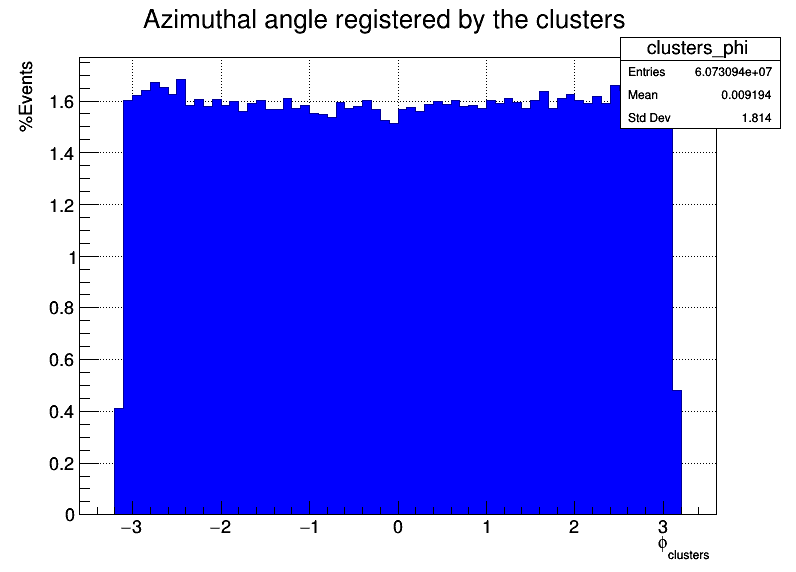

In [18]:
scale = hist_clusters_phi.Integral()
hist_clusters_phi.Scale(100./scale)
hist_clusters_phi.SetFillColor(4)
hist_clusters_phi.Draw("hist")
canvas.Draw()

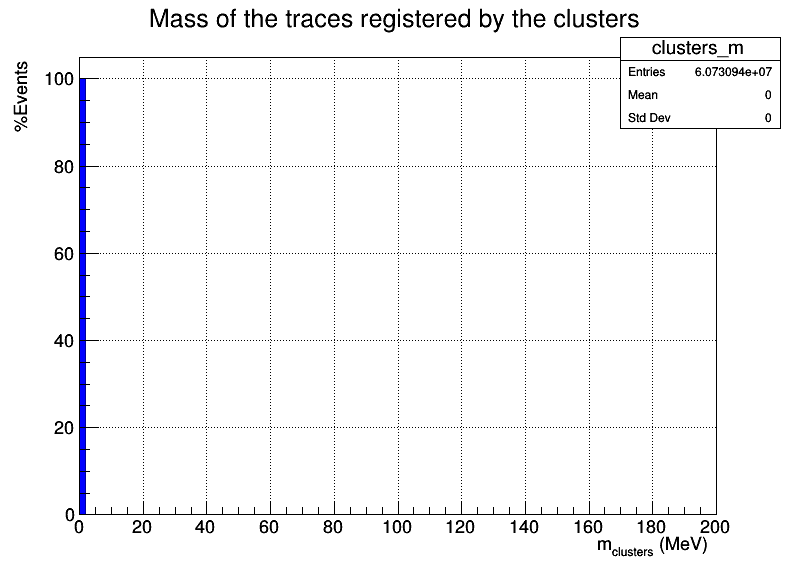

In [19]:
scale = hist_clusters_m.Integral()
hist_clusters_m.Scale(100./scale)
hist_clusters_m.SetFillColor(4)
hist_clusters_m.Draw("hist")
canvas.Draw()

##What is "Particle PDG ID"?

Según la PDG,  to simulations, the define a Monte Carlo particle numbering scheme  that facilitate interfacing between event generators, detector simulators, and analysis packages used in particle physics.

It associates to each known and hypothetical particle an identifying number (ID) as follows.


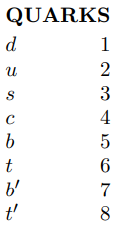

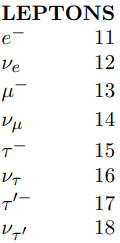


The table is extensive, as it includes composite particles, and common nomenclatures for certain models, and it can be found in https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf